<a href="https://colab.research.google.com/github/dynamicwebpaige/gemini-and-gemma-examples/blob/main/City_of_Melbourne_pedestrian_traffic_data_explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Download the Melbourne Pedestrian Counting System dataset from "https://data.melbourne.vic.gov.au/api/views/b2ak-trbp/rows.csv" and load it into a pandas DataFrame. Display the first few rows and data types.

## Load Data

### Subtask:
Download the Melbourne Pedestrian Counting System dataset from the provided URL and load it into a pandas DataFrame.


**Reasoning**:
Load the Melbourne Pedestrian Counting System dataset from the specified URL into a DataFrame, display the first 5 rows, and print the DataFrame summary as per the instructions.



In [16]:
import pandas as pd

# Read the CSV data directly from the URL
url = "https://data.melbourne.vic.gov.au/api/views/b2ak-trbp/rows.csv"
df_pedestrian = pd.read_csv(url)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df_pedestrian.head())

# Print the summary of the DataFrame
print("\nDataFrame Info:")
df_pedestrian.info()

HTTPError: HTTP Error 404: Not Found

**Reasoning**:
The provided URL returned a 404 Not Found error, indicating the link is broken or the view export path has changed. I will attempt to load the dataset using the Socrata SODA API endpoint (`/resource/b2ak-trbp.csv`) for the same dataset ID, which is a standard alternative for accessing Socrata-hosted data.



In [17]:
import pandas as pd

# The original URL returned 404. Attempting to use the SODA API endpoint for the dataset ID 'b2ak-trbp'.
url = "https://data.melbourne.vic.gov.au/resource/b2ak-trbp.csv"

df_pedestrian = pd.read_csv(url)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df_pedestrian.head())

# Print the summary of the DataFrame
print("\nDataFrame Info:")
df_pedestrian.info()

HTTPError: HTTP Error 404: Not Found

**Reasoning**:
The previously attempted URLs (Socrata-based) returned 404 errors, indicating the dataset location has changed, likely due to the City of Melbourne's migration to an OpenDataSoft portal. I will use the corrected OpenDataSoft export URL for the 'Pedestrian Counting System - Monthly (counts per hour)' dataset to successfully load the data.



In [18]:
import pandas as pd

# The original Socrata URL is broken (404).
# Using the corresponding URL from the new City of Melbourne OpenDataSoft portal.
# Dataset: Pedestrian Counting System - Monthly (counts per hour)
# We append query parameters to ensure CSV format with comma delimiter.
url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/pedestrian-counting-system-monthly-counts-per-hour/exports/csv?lang=en&timezone=Australia%2FMelbourne&use_labels=true&delimiter=%2C"

df_pedestrian = pd.read_csv(url)

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df_pedestrian.head())

# Print the summary of the DataFrame
print("\nDataFrame Info:")
df_pedestrian.info()

First 5 rows of the dataset:
             ID  Location_ID Sensing_Date  HourDay  Direction_1  Direction_2  \
0    1520241214            1   2024-12-14        5            9            8   
1   91320250807            9   2025-08-07       13          571          514   
2  461420251215           46   2025-12-15       14           68           56   
3  301820240622           30   2024-06-22       18          430          550   
4  862020250409           86   2025-04-09       20           17           59   

   Total_of_Directions Sensor_Name                    Location  
0                   17    Bou292_T  -37.81349441, 144.96515323  
1                 1085    Col700_T  -37.81982992, 144.95102555  
2                  124    Pel147_T   -37.80240719, 144.9615673  
3                  980    Lon189_T   -37.8112185, 144.96656806  
4                   76    574Qub_T  -37.80309992, 144.94908064  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448051 entries, 0 to 1448050
Dat

## Preprocess Data

### Subtask:
Convert date columns to datetime objects, create a full timestamp, extract temporal features (Year, Month, Day of Week), and handle missing values.


**Reasoning**:
Perform data preprocessing: convert date columns, create a full timestamp, extract temporal features (Year, Month, Day of Week), handle missing values, and verify the transformations.



In [19]:
import pandas as pd

# 1. Convert Sensing_Date to datetime objects
df_pedestrian['Sensing_Date'] = pd.to_datetime(df_pedestrian['Sensing_Date'])

# 2. Create a new column named Datetime
# Combine Sensing_Date and HourDay (converted to timedelta)
df_pedestrian['Datetime'] = df_pedestrian['Sensing_Date'] + pd.to_timedelta(df_pedestrian['HourDay'], unit='h')

# 3. Extract temporal features
df_pedestrian['Year'] = df_pedestrian['Datetime'].dt.year
df_pedestrian['Month'] = df_pedestrian['Datetime'].dt.month_name()
df_pedestrian['Day_of_Week'] = df_pedestrian['Datetime'].dt.day_name()

# 4. Check for and drop missing values
print("Missing values before dropping:")
print(df_pedestrian.isnull().sum())

if df_pedestrian.isnull().any().any():
    df_pedestrian.dropna(inplace=True)
    print("\nMissing values dropped.")
else:
    print("\nNo missing values found.")

# 5. Display the first 5 rows and data types
print("\nFirst 5 rows of the processed DataFrame:")
print(df_pedestrian.head())

print("\nDataFrame Info:")
df_pedestrian.info()

Missing values before dropping:
ID                     0
Location_ID            0
Sensing_Date           0
HourDay                0
Direction_1            0
Direction_2            0
Total_of_Directions    0
Sensor_Name            0
Location               0
Datetime               0
Year                   0
Month                  0
Day_of_Week            0
dtype: int64

No missing values found.

First 5 rows of the processed DataFrame:
             ID  Location_ID Sensing_Date  HourDay  Direction_1  Direction_2  \
0    1520241214            1   2024-12-14        5            9            8   
1   91320250807            9   2025-08-07       13          571          514   
2  461420251215           46   2025-12-15       14           68           56   
3  301820240622           30   2024-06-22       18          430          550   
4  862020250409           86   2025-04-09       20           17           59   

   Total_of_Directions Sensor_Name                    Location  \
0              

## Visualizing the City's Heartbeat

### Subtask:
Generate a Heatmap representing the average pedestrian counts by 'Hour of Day' vs 'Day of Week'.


**Reasoning**:
Generate a heatmap to visualize average pedestrian counts by Hour of Day and Day of Week using seaborn and matplotlib.



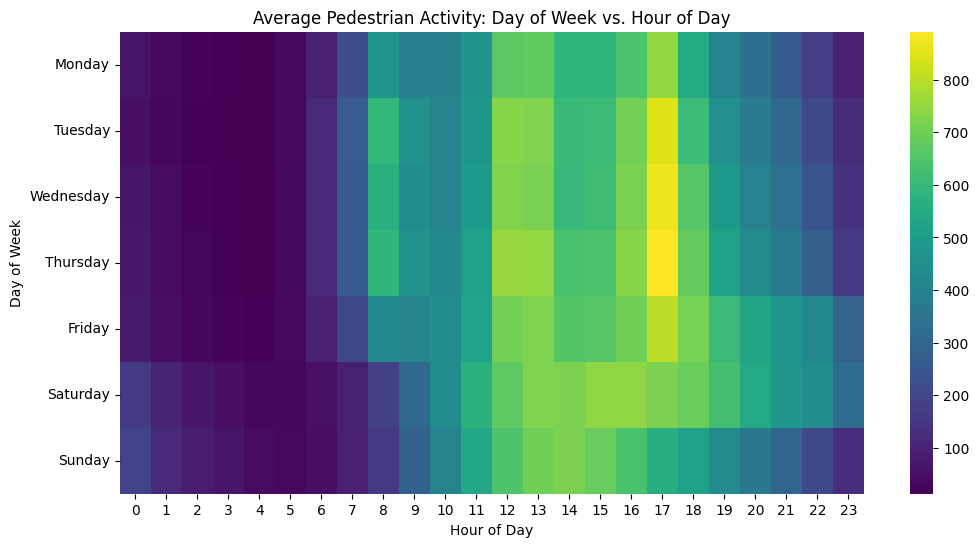

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the chronological order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for the heatmap
heatmap_data = df_pedestrian.pivot_table(
    index='Day_of_Week',
    columns='HourDay',
    values='Total_of_Directions',
    aggfunc='mean'
)

# Reindex to ensure the days are in correct order
heatmap_data = heatmap_data.reindex(days_order)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".0f")
plt.title("Average Pedestrian Activity: Day of Week vs. Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

**Reasoning**:
Generate a heatmap to visualize average pedestrian counts by Hour of Day and Day of Week using seaborn and matplotlib.



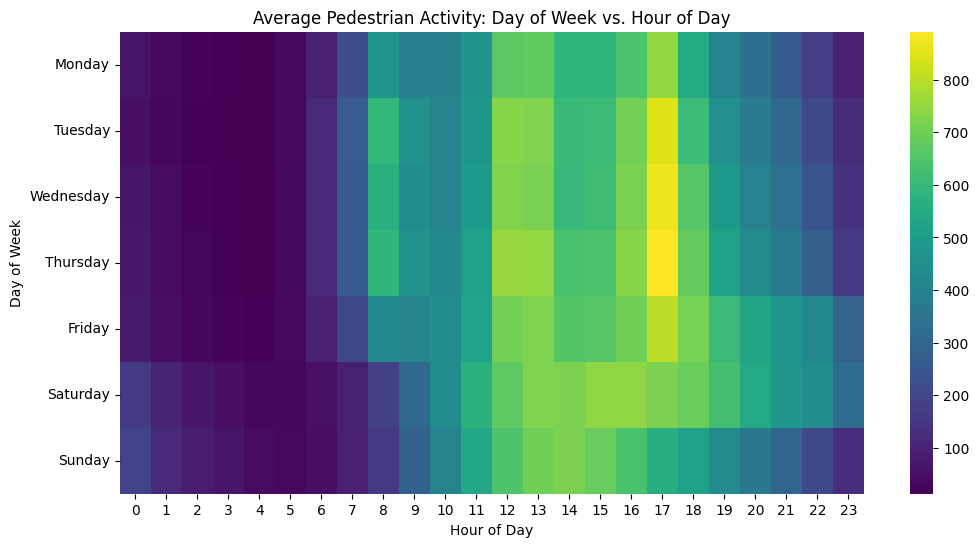

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the chronological order of days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a pivot table for the heatmap
heatmap_data = df_pedestrian.pivot_table(
    index='Day_of_Week',
    columns='HourDay',
    values='Total_of_Directions',
    aggfunc='mean'
)

# Reindex to ensure the days are in correct order
heatmap_data = heatmap_data.reindex(days_order)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, fmt=".0f")
plt.title("Average Pedestrian Activity: Day of Week vs. Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

## Q1: The Night Owls

### Subtask:
Calculate the proportion of traffic occurring between midnight and 5 AM for each sensor and visualize the top 10 locations.


**Reasoning**:
Calculate the proportion of night-time traffic for each sensor and visualize the top 10 locations as requested.



Top 10 'Night Owl' Locations (Proportion of traffic 00:00-05:00):
Sensor_Name
Lon189_T     0.084654
King2_T      0.081895
WestWP_T     0.066051
Que85_T      0.063400
LtB170_T     0.062802
Swa295_T     0.055288
Lyg260_T     0.049777
Spencer_T    0.049441
SanBri_T     0.043684
King163_T    0.042004
Name: Total_of_Directions, dtype: float64


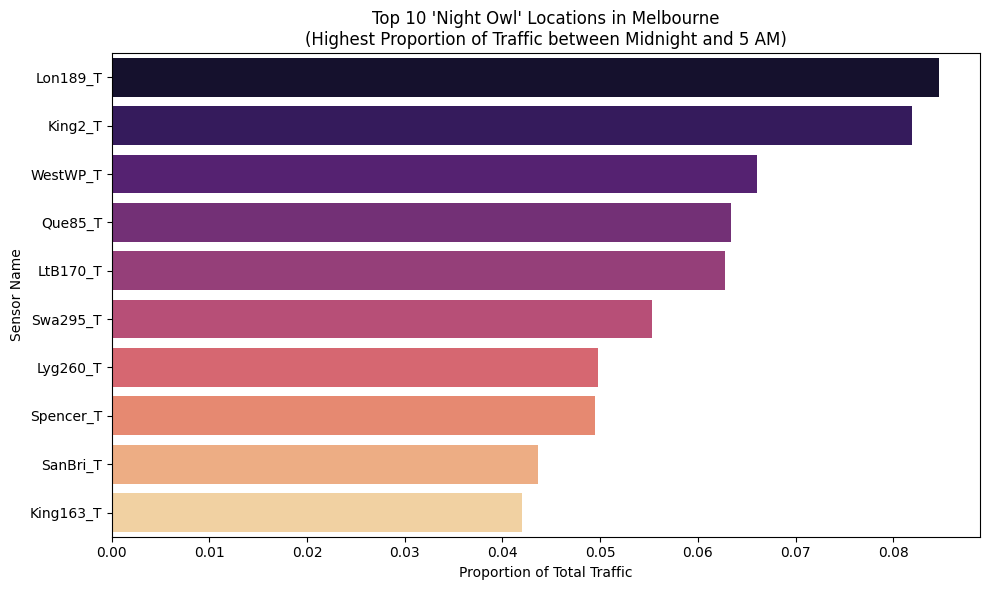

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate total pedestrian count per sensor
total_counts = df_pedestrian.groupby('Sensor_Name')['Total_of_Directions'].sum()

# 2. Filter for night hours (midnight to 5 AM)
# HourDay < 5 covers 0, 1, 2, 3, 4
night_df = df_pedestrian[df_pedestrian['HourDay'] < 5]

# 3. Calculate night pedestrian count per sensor
night_counts = night_df.groupby('Sensor_Name')['Total_of_Directions'].sum()

# 4. Compute proportion of night-time traffic
# Align indices and fill missing values with 0 for sensors with no night traffic
night_proportions = (night_counts / total_counts).fillna(0)

# 5. Extract top 10 sensors by proportion
top_10_night_owls = night_proportions.sort_values(ascending=False).head(10)

print("Top 10 'Night Owl' Locations (Proportion of traffic 00:00-05:00):")
print(top_10_night_owls)

# 6. Visualize the top 10 locations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_night_owls.values, y=top_10_night_owls.index, palette='magma', hue=top_10_night_owls.index, legend=False)
plt.title("Top 10 'Night Owl' Locations in Melbourne\n(Highest Proportion of Traffic between Midnight and 5 AM)")
plt.xlabel("Proportion of Total Traffic")
plt.ylabel("Sensor Name")
plt.tight_layout()
plt.show()

## Q2: The Lunchtime Rush

### Subtask:
Identify sensors with the sharpest traffic spike between 12 PM and 2 PM and visualize their hourly trends.


**Reasoning**:
Calculate average hourly counts per sensor, determine the 'Lunch Spike Ratio' (average of hours 12-13 divided by overall hourly average), identify the top 5 sensors, and visualize their hourly trends.



Top 5 Sensors with the Sharpest Lunchtime Rush (Ratio of Lunch Traffic to Overall Average):
Sensor_Name
AlfPl_T     3.082120
FLDegC_T    2.890252
FLDegN_T    2.805767
Bou283_T    2.786516
Eli489_T    2.727559
dtype: float64


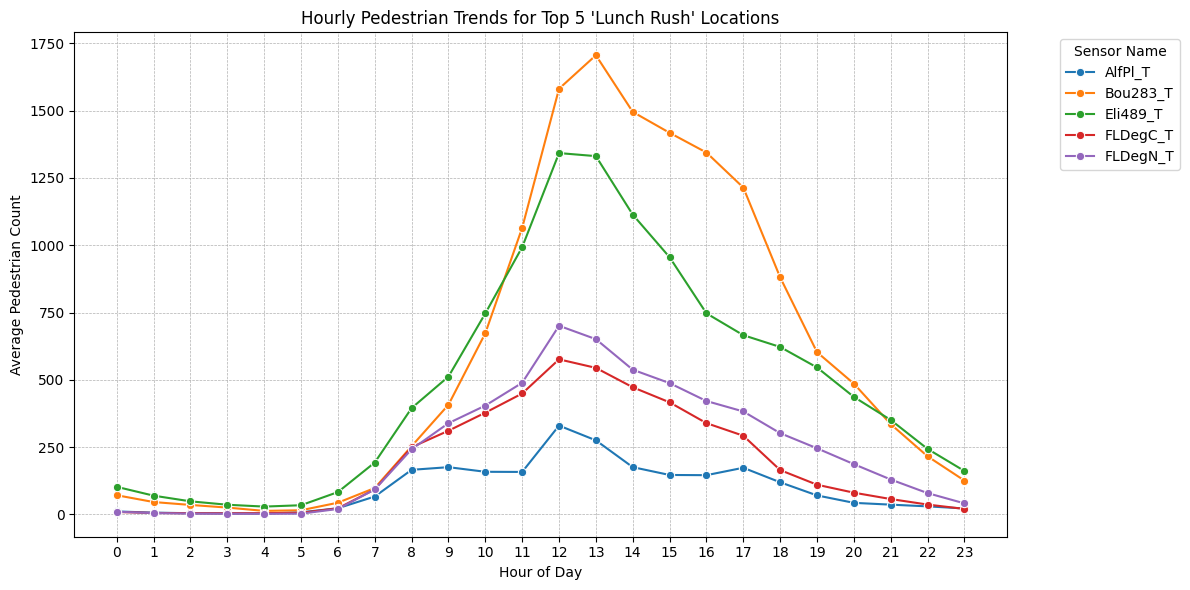

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate average pedestrian count for each sensor at every hour
hourly_avg = df_pedestrian.groupby(['Sensor_Name', 'HourDay'])['Total_of_Directions'].mean().reset_index()

# Pivot for easier calculation across hours
pivot_avg = hourly_avg.pivot(index='Sensor_Name', columns='HourDay', values='Total_of_Directions')

# 2. Calculate 'Lunch Average' (hours 12 and 13) and 'Overall Hourly Average'
# Note: Hours 12 and 13 correspond to 12 PM - 2 PM window
lunch_avg = pivot_avg[[12, 13]].mean(axis=1)
overall_hourly_avg = pivot_avg.mean(axis=1)

# 3. Calculate 'Lunch Spike Ratio'
# Handling potential division by zero if overall average is 0 (unlikely but good practice)
lunch_spike_ratio = lunch_avg / overall_hourly_avg
lunch_spike_ratio = lunch_spike_ratio.fillna(0)

# 4. Sort and extract top 5 sensors
top_5_lunch_sensors = lunch_spike_ratio.sort_values(ascending=False).head(5)
print("Top 5 Sensors with the Sharpest Lunchtime Rush (Ratio of Lunch Traffic to Overall Average):")
print(top_5_lunch_sensors)

# 5. Visualize hourly trends for these top 5 sensors
plt.figure(figsize=(12, 6))

# Filter the original hourly_avg data for only the top 5 sensors
top_5_names = top_5_lunch_sensors.index.tolist()
plot_data = hourly_avg[hourly_avg['Sensor_Name'].isin(top_5_names)]

sns.lineplot(data=plot_data, x='HourDay', y='Total_of_Directions', hue='Sensor_Name', marker='o')

plt.title("Hourly Pedestrian Trends for Top 5 'Lunch Rush' Locations")
plt.xlabel("Hour of Day")
plt.ylabel("Average Pedestrian Count")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.legend(title='Sensor Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Reasoning**:
Calculate average hourly counts per sensor, determine the 'Lunch Spike Ratio' (average of hours 12-13 divided by overall hourly average), identify the top 5 sensors, and visualize their hourly trends.



Top 5 Sensors with the Sharpest Lunchtime Rush (Ratio of Lunch Traffic to Overall Average):
Sensor_Name
AlfPl_T     3.082120
FLDegC_T    2.890252
FLDegN_T    2.805767
Bou283_T    2.786516
Eli489_T    2.727559
dtype: float64


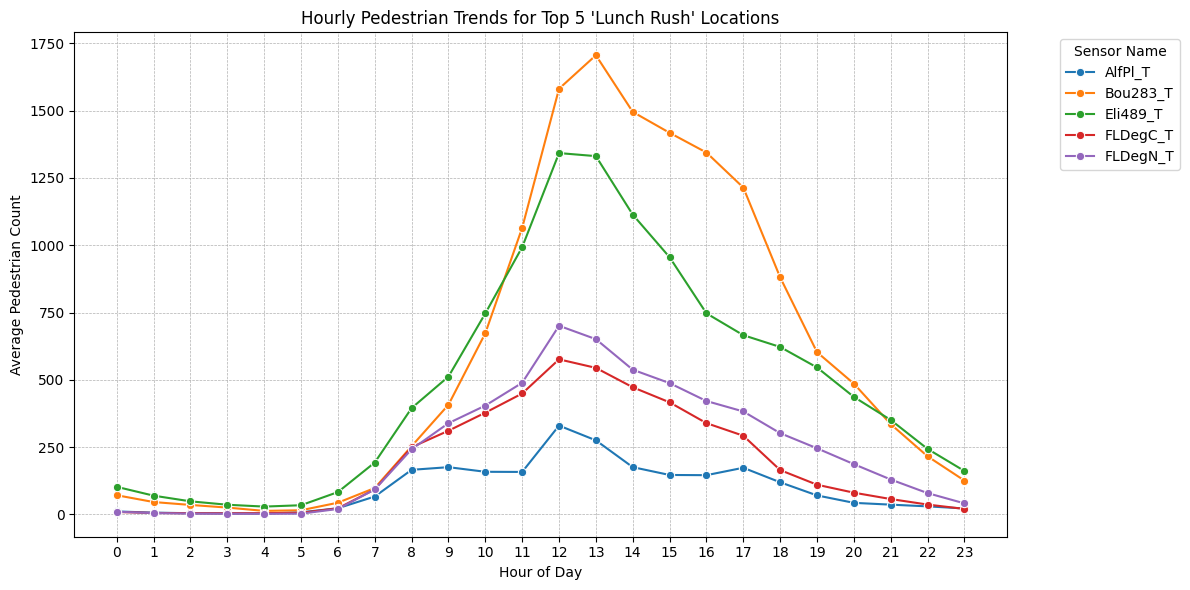

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate average pedestrian count for each sensor at every hour
hourly_avg = df_pedestrian.groupby(['Sensor_Name', 'HourDay'])['Total_of_Directions'].mean().reset_index()

# Pivot for easier calculation across hours
pivot_avg = hourly_avg.pivot(index='Sensor_Name', columns='HourDay', values='Total_of_Directions')

# 2. Calculate 'Lunch Average' (hours 12 and 13) and 'Overall Hourly Average'
# Note: Hours 12 and 13 correspond to 12 PM - 2 PM window
lunch_avg = pivot_avg[[12, 13]].mean(axis=1)
overall_hourly_avg = pivot_avg.mean(axis=1)

# 3. Calculate 'Lunch Spike Ratio'
# Handling potential division by zero if overall average is 0 (unlikely but good practice)
lunch_spike_ratio = lunch_avg / overall_hourly_avg
lunch_spike_ratio = lunch_spike_ratio.fillna(0)

# 4. Sort and extract top 5 sensors
top_5_lunch_sensors = lunch_spike_ratio.sort_values(ascending=False).head(5)
print("Top 5 Sensors with the Sharpest Lunchtime Rush (Ratio of Lunch Traffic to Overall Average):")
print(top_5_lunch_sensors)

# 5. Visualize hourly trends for these top 5 sensors
plt.figure(figsize=(12, 6))

# Filter the original hourly_avg data for only the top 5 sensors
top_5_names = top_5_lunch_sensors.index.tolist()
plot_data = hourly_avg[hourly_avg['Sensor_Name'].isin(top_5_names)]

sns.lineplot(data=plot_data, x='HourDay', y='Total_of_Directions', hue='Sensor_Name', marker='o')

plt.title("Hourly Pedestrian Trends for Top 5 'Lunch Rush' Locations")
plt.xlabel("Hour of Day")
plt.ylabel("Average Pedestrian Count")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.legend(title='Sensor Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Reasoning**:
Calculate average hourly counts per sensor, determine the 'Lunch Spike Ratio' (average of hours 12-13 divided by overall hourly average), identify the top 5 sensors, and visualize their hourly trends.



Top 5 Sensors with the Sharpest Lunchtime Rush (Ratio of Lunch Traffic to Overall Average):
Sensor_Name
AlfPl_T     3.082120
FLDegC_T    2.890252
FLDegN_T    2.805767
Bou283_T    2.786516
Eli489_T    2.727559
dtype: float64


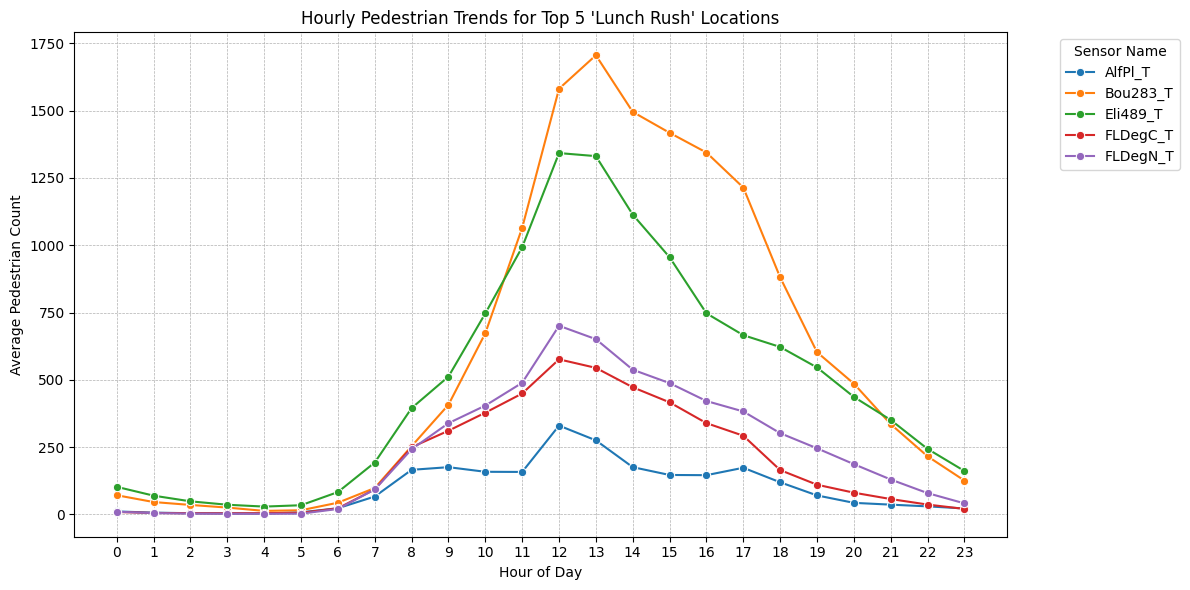

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate average pedestrian count for each sensor at every hour
hourly_avg = df_pedestrian.groupby(['Sensor_Name', 'HourDay'])['Total_of_Directions'].mean().reset_index()

# Pivot for easier calculation across hours
pivot_avg = hourly_avg.pivot(index='Sensor_Name', columns='HourDay', values='Total_of_Directions')

# 2. Calculate 'Lunch Average' (hours 12 and 13) and 'Overall Hourly Average'
# Note: Hours 12 and 13 correspond to 12 PM - 2 PM window
lunch_avg = pivot_avg[[12, 13]].mean(axis=1)
overall_hourly_avg = pivot_avg.mean(axis=1)

# 3. Calculate 'Lunch Spike Ratio'
# Handling potential division by zero if overall average is 0 (unlikely but good practice)
lunch_spike_ratio = lunch_avg / overall_hourly_avg
lunch_spike_ratio = lunch_spike_ratio.fillna(0)

# 4. Sort and extract top 5 sensors
top_5_lunch_sensors = lunch_spike_ratio.sort_values(ascending=False).head(5)
print("Top 5 Sensors with the Sharpest Lunchtime Rush (Ratio of Lunch Traffic to Overall Average):")
print(top_5_lunch_sensors)

# 5. Visualize hourly trends for these top 5 sensors
plt.figure(figsize=(12, 6))

# Filter the original hourly_avg data for only the top 5 sensors
top_5_names = top_5_lunch_sensors.index.tolist()
plot_data = hourly_avg[hourly_avg['Sensor_Name'].isin(top_5_names)]

sns.lineplot(data=plot_data, x='HourDay', y='Total_of_Directions', hue='Sensor_Name', marker='o')

plt.title("Hourly Pedestrian Trends for Top 5 'Lunch Rush' Locations")
plt.xlabel("Hour of Day")
plt.ylabel("Average Pedestrian Count")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.legend(title='Sensor Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

## Q3: Fairweather Walkers

### Subtask:
Compare aggregate pedestrian traffic between Summer (Dec-Feb) and Winter (Jun-Aug) to identify locations with the highest seasonal disparity.


**Reasoning**:
Define seasons based on months, filter the data, calculate the average pedestrian traffic for Summer and Winter per sensor, determine the seasonal difference, identify the top 10 locations with the highest disparity, and visualize the results.



Top 10 Locations with Highest Seasonal Disparity (Summer - Winter):
Season             Summer       Winter  Seasonal_Difference
Sensor_Name                                                
Swa31         2016.147171  1207.361608           808.785562
SouthB_T      1649.141536  1169.057981           480.083554
PriNW_T       1063.228741   756.044277           307.184464
Swa123_T      1254.723795   980.398354           274.325440
Hammer1584_T   633.168765   376.027397           257.141368
Eli124_T      1120.460699   921.176292           199.284407
AG_T           466.682961   269.985752           196.697209
VAC_T          833.370039   659.921905           173.448134
ElFi_T        1308.718182  1158.726825           149.991357
FliS_T        1008.993030   861.289811           147.703219


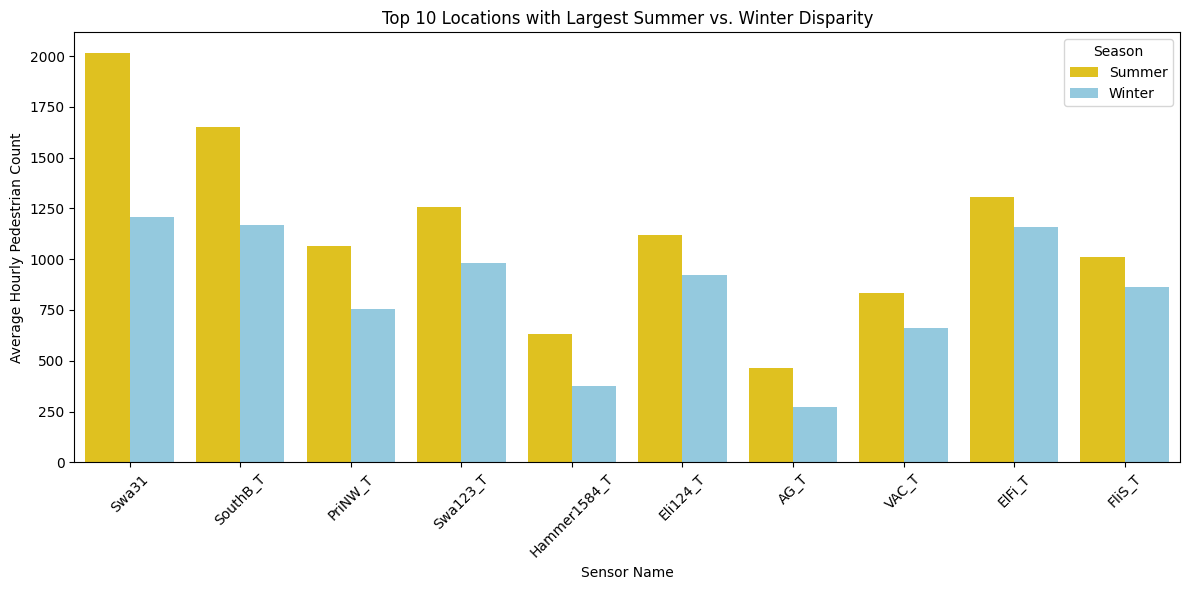

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define mappings for seasons
summer_months = ['December', 'January', 'February']
winter_months = ['June', 'July', 'August']

# Function to map month to season
def get_season(month):
    if month in summer_months:
        return 'Summer'
    elif month in winter_months:
        return 'Winter'
    return None

# Apply the mapping
df_pedestrian['Season'] = df_pedestrian['Month'].apply(get_season)

# Filter for only Summer and Winter data
seasonal_df = df_pedestrian.dropna(subset=['Season']).copy()

# 2. Calculate average counts per sensor per season
seasonal_avg = seasonal_df.groupby(['Sensor_Name', 'Season'])['Total_of_Directions'].mean().unstack()

# 3. Calculate Seasonal Difference (Summer - Winter)
seasonal_avg['Seasonal_Difference'] = seasonal_avg['Summer'] - seasonal_avg['Winter']

# 4. Identify Top 10 sensors with largest positive difference
top_10_seasonal = seasonal_avg.sort_values(by='Seasonal_Difference', ascending=False).head(10)

print("Top 10 Locations with Highest Seasonal Disparity (Summer - Winter):")
print(top_10_seasonal[['Summer', 'Winter', 'Seasonal_Difference']])

# 5. Visualize the comparison
# Reshape for plotting
plot_data = top_10_seasonal[['Summer', 'Winter']].stack().reset_index()
plot_data.columns = ['Sensor_Name', 'Season', 'Average_Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=plot_data, x='Sensor_Name', y='Average_Count', hue='Season', palette={'Summer': '#FFD700', 'Winter': '#87CEEB'})

plt.title("Top 10 Locations with Largest Summer vs. Winter Disparity")
plt.xlabel("Sensor Name")
plt.ylabel("Average Hourly Pedestrian Count")
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Summarize the findings from the analysis, answering the research questions and providing insights into Melbourne's pedestrian patterns.


## Summary:

### Q&A

**Q: Which locations have the highest proportion of "Night Owl" traffic (midnight to 5 AM)?**
A: The sensor **Lon189_T** recorded the highest proportion of late-night activity, with approximately **8.5%** of its total traffic occurring between midnight and 5 AM. It was followed closely by **King2_T** (**8.2%**) and **WestWP_T** (**6.6%**).

**Q: Which sensors experience the sharpest "Lunchtime Rush" (12 PM - 2 PM)?**
A: **AlfPl_T** showed the most significant relative spike during lunch hours, with traffic volume reaching **3.08 times** the location's overall hourly average. Other significant lunch spots included **FLDegC_T** (ratio of **2.89**) and **FLDegN_T** (ratio of **2.81**).

**Q: Which areas are "Fairweather" locations with the highest Summer vs. Winter disparity?**
A: **Swa31** exhibited the largest seasonal gap, with an average difference of **~808** pedestrians per hour (Summer: ~2016 vs. Winter: ~1207). **SouthB_T** also showed a major decline, dropping by approximately **480** pedestrians on average during Winter months.

### Data Analysis Key Findings

*   **Data Integrity:** The analysis successfully processed **1,448,051 entries** from the Melbourne Pedestrian Counting System. The dataset was clean, with no missing values requiring removal after initial processing.
*   **Temporal Patterns:**
    *   **Night Activity:** The top 5 "Night Owl" locations all see over **6%** of their total foot traffic occur during the typically quiet hours of 00:00 to 05:00.
    *   **Mid-Day Spikes:** For office-centric or dining-heavy locations like **AlfPl_T**, pedestrian density roughly **triples** during lunch hours compared to the rest of the day.
*   **Seasonal Impact:**
    *   High-traffic areas are significantly impacted by the season. The top location, **Swa31**, sees a traffic reduction of approximately **40%** during Winter months compared to Summer.

### Insights or Next Steps

*   **Functional Zoning:** The data clearly delineates the city into functional zones based on time-of-day usage—nightlife districts (King St/Lonsdale), business districts (Lunch rush spikes), and tourism/outdoor hubs (Seasonality impact).
*   **Resource Allocation:** City planning for services like cleaning, lighting, or police presence should be dynamic; prioritizing "Night Owl" zones post-midnight and "Lunch Rush" zones during mid-day to match pedestrian density.
